In [2]:
# cifar 10 dataset
from keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

170500096/170498071 [==============================] - 489s 3us/step


In [3]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [4]:
trans = ["飛機", "汽車", "鳥", "貓", "鹿", "狗", "青蛙", "馬", "船", "卡車"]

鹿


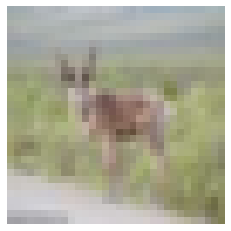

In [5]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
c = random.randint(0, 49999)
plt.axis("off")
# trans[0] -> 飛機
# xx -> trans[ [0] ] 不行
category = y_train[c][0]
print(trans[category])
plt.imshow(x_train[c])

In [6]:
# 資料預處理 => 圖片一定要縮小至 0-1
# 1. 題目預處理(Normalize)
# 卷積不需要攤開
x_train_shape = x_train / 255
x_test_shape = x_test / 255
x_train_shape[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [7]:
# 2.答案預處理 => one-hot-encoding
# 跟上次一模一樣
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print("原來:",y_train[1])
print("後來:",y_train_cat[1])

原來: [9]
後來: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [13]:
from keras.models import Sequential
# MLP
from keras.layers import Dense, Flatten
# Conv
from keras.layers import Conv2D, MaxPooling2D
cnn = Sequential()
# (一個過濾器) 3 * 3 * 3 * (filter數目) 32 + (bias)32 = 896
cnn.add(Conv2D(32, (3, 3), 
               input_shape=(32, 32, 3),
               padding="same",
               activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
# (一個過濾器) 3 * 3 * 32 * (filter數目) 64 + (bias)64 = 18496
cnn.add(Conv2D(64, (3, 3), 
               padding="same",
               activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
# (一個過濾器) 3 * 3 * 64 * (filter數目) 128 + (bias)128 = 73856     
cnn.add(Conv2D(128, (3, 3), 
               padding="same",
               activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(256, activation="relu"))
cnn.add(Dense(10, activation="softmax"))
cnn.summary()
# 一個 filter 搭配一個 activition = 一個 bias
# 最後 => 以 128 個角度看事情

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)             

In [ ]:
# 確定模型訓練方式....等
# 隨機(隨便選出一組weights)梯度(正確方向)下降
# loss : 最後輸出一個: binary_crossentropy, 最後輸出多個: categorical_crossentropy
# optimizer: 下降的時候優化 -> 基於動量(我在走的時候不是等於速度,而是速度的累積)
cnn.compile(loss="categorical_crossentropy", 
            metrics=["accuracy"],
           optimizer="adam")

In [ ]:
# 以下運用 google colab 線上跑

In [ ]:
# batch: 看幾筆(200)做一次梯度下降(修正)
# epochs: 整份考古題看幾次(10)
# 10個 epochs, 200batch: 60000 * 10 / 200 -> 300(次)
# 停下的時機: 只要看 val_loss 變平滑
cnn.fit(x_train_shape,
        y_train_cat,
        batch_size=200,
        epochs=5,
        validation_split=0.1,
        verbose=2)

In [ ]:
cnn.evaluate(x_test_shape, y_test_cat)

In [ ]:
# predict -> 出現10個機率
# predict_classes -> 分類
#  ["飛機", "汽車", "鳥", "貓", "鹿", "狗", "青蛙", "馬", "船", "卡車"]
import pandas as pd
pre = cnn.predict_classes(x_test_shape)
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, pre))

In [ ]:
# 判斷 x_test 跟 y_test 的 shape
# numpy 才能直接數字比較
# 發現tuple => 打開她
# list: list[一個數字]
# numpy array: nparray[ [多個數字] ]
import numpy as np
y_dim = y_test.reshape(10000)
diff = np.nonzero(pre != y_dim)[0]
# 預測錯誤圖的原本標籤
orifalse = y_test[diff]
# 原本錯誤圖的預測標籤
prefalse = pre[diff]
# 把圖拿出來
imgfalse = x_test[diff]
# 整張圖寬和高
plt.figure(figsize=(14, 450))
weight = 10
height = int(len(imgfalse)/10)+1
for (i, img) in enumerate(imgfalse[0:100]):
    # (列述, 行數, 第幾張圖(i開始) )    
    plt.subplot(height, weight, i + 1)
    plt.axis("off")
    t = "[p]:" + str(prefalse[i]) + "[o]:" + str(orifalse[i])
    plt.title(t)
    plt.imshow(img)